In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/dermatology_database_1.csv")

# Replace non-numeric 'age' values
data['age'] = data['age'].replace('?', None).astype(float)
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)

# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


<ipython-input-1-573ddde0c0a0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(median_age, inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: Undefine

SVM Accuracy: 0.7297297297297297
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74

Random Forest Accuracy: 0.9864864864864865
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00 

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = X.apply(zscore)

# Remove rows with Z-scores greater than 3 or less than -3
X_clean = X[(z_scores < 3).all(axis=1)]
y_clean = y[X_clean.index]

# Split into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Retrain and evaluate SVM
svm_model.fit(X_train_clean, y_train_clean)
y_pred_svm_clean = svm_model.predict(X_test_clean)
print("SVM (Cleaned Data) Accuracy:", accuracy_score(y_test_clean, y_pred_svm_clean))
print("SVM (Cleaned Data) Classification Report:\n", classification_report(y_test_clean, y_pred_svm_clean))

# Retrain and evaluate Random Forest
rf_model.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf_model.predict(X_test_clean)
print("Random Forest (Cleaned Data) Accuracy:", accuracy_score(y_test_clean, y_pred_rf_clean))
print("Random Forest (Cleaned Data) Classification Report:\n", classification_report(y_test_clean, y_pred_rf_clean))


SVM (Cleaned Data) Accuracy: 0.6792452830188679
SVM (Cleaned Data) Classification Report:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86        18
           2       0.45      0.45      0.45        11
           3       1.00      1.00      1.00         8
           4       0.50      0.71      0.59         7
           5       0.00      0.00      0.00         9

    accuracy                           0.68        53
   macro avg       0.54      0.63      0.58        53
weighted avg       0.57      0.68      0.61        53



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest (Cleaned Data) Accuracy: 0.9622641509433962
Random Forest (Cleaned Data) Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00         8
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00         9

    accuracy                           0.96        53
   macro avg       0.95      0.95      0.95        53
weighted avg       0.96      0.96      0.96        53



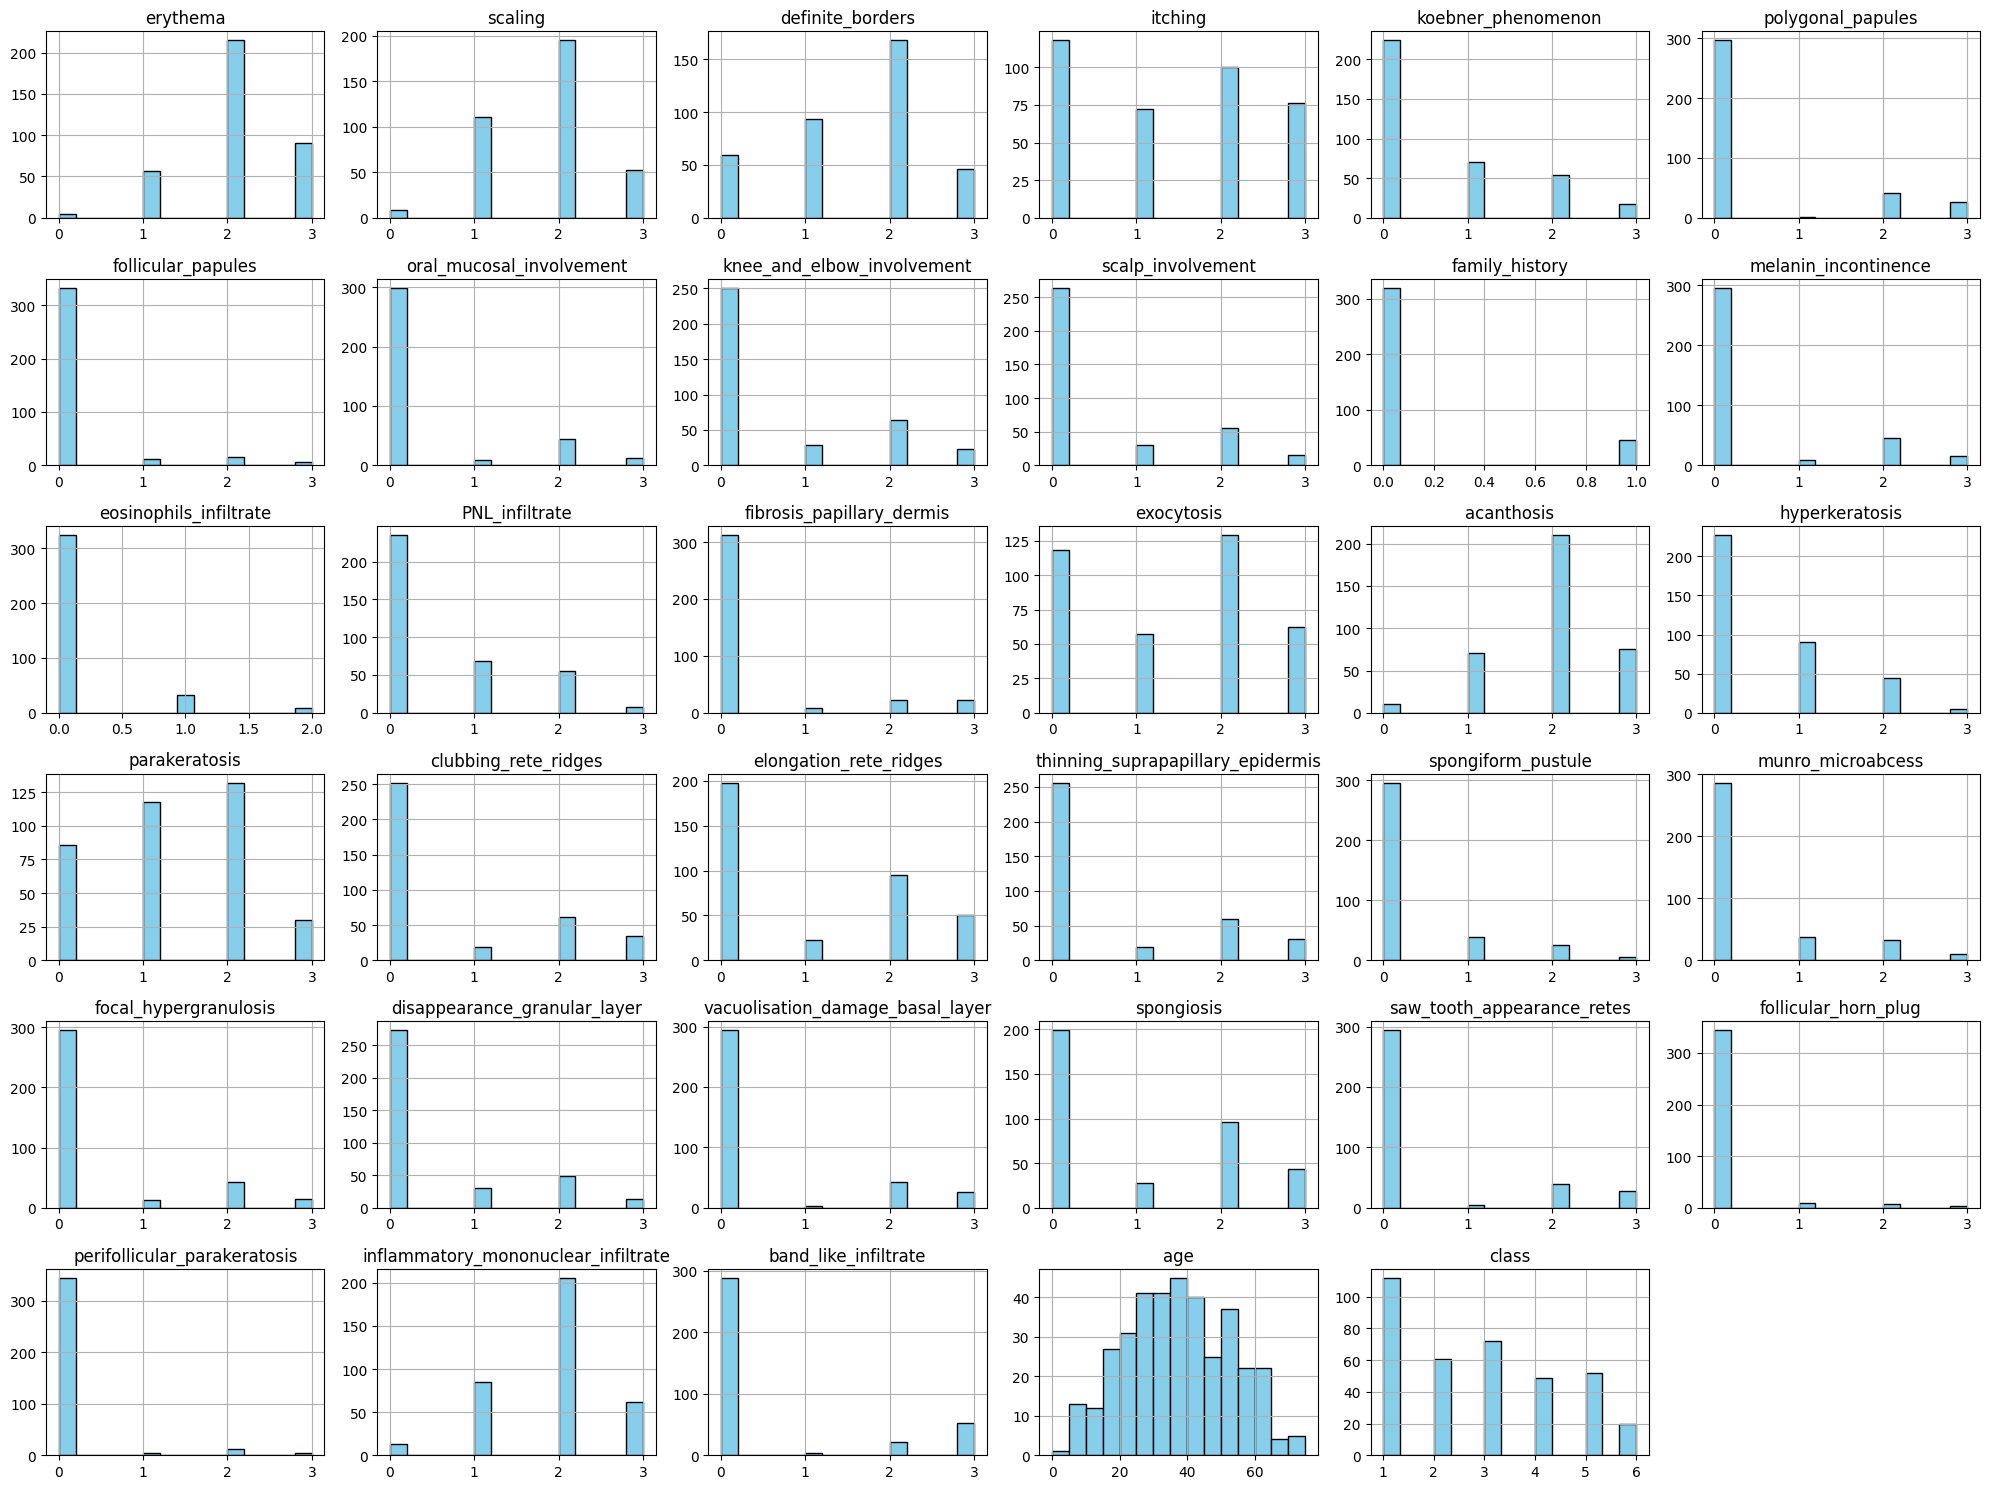

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each column
data.hist(bins=15, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


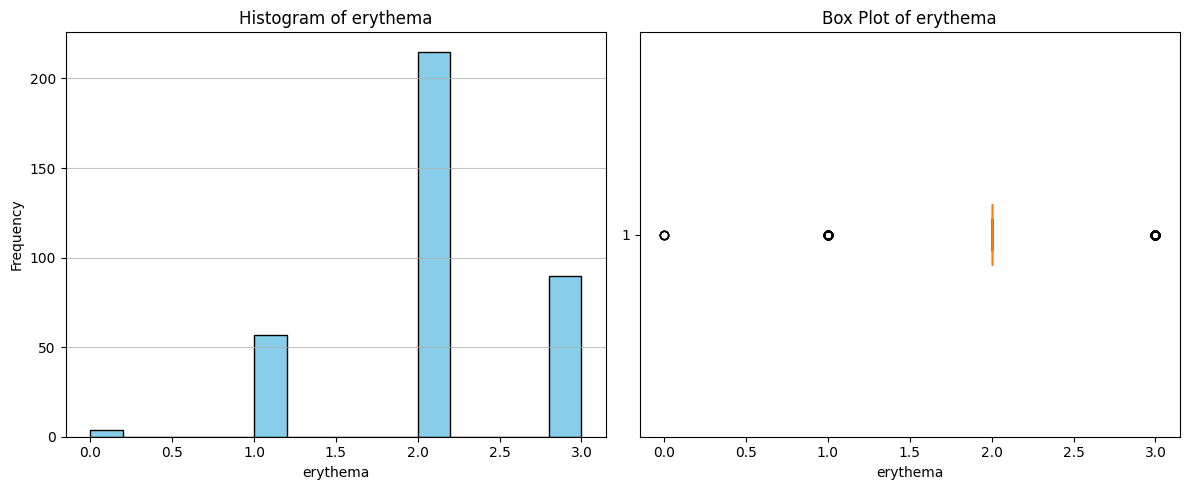

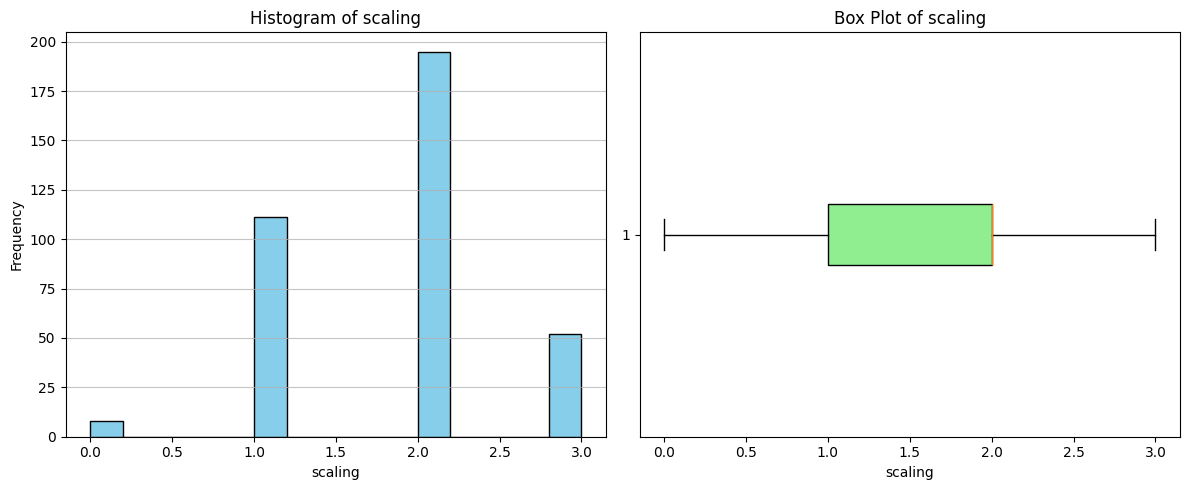

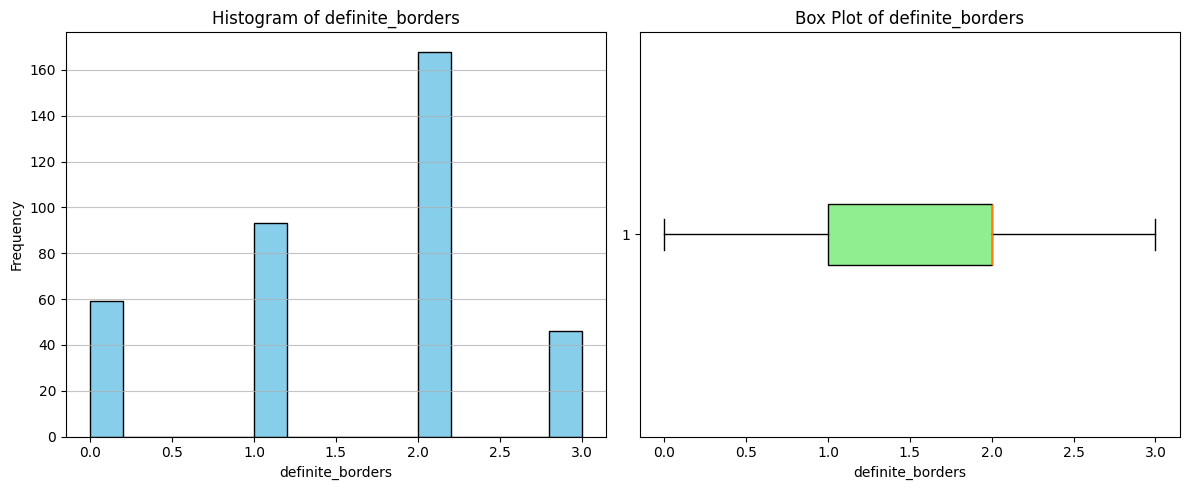

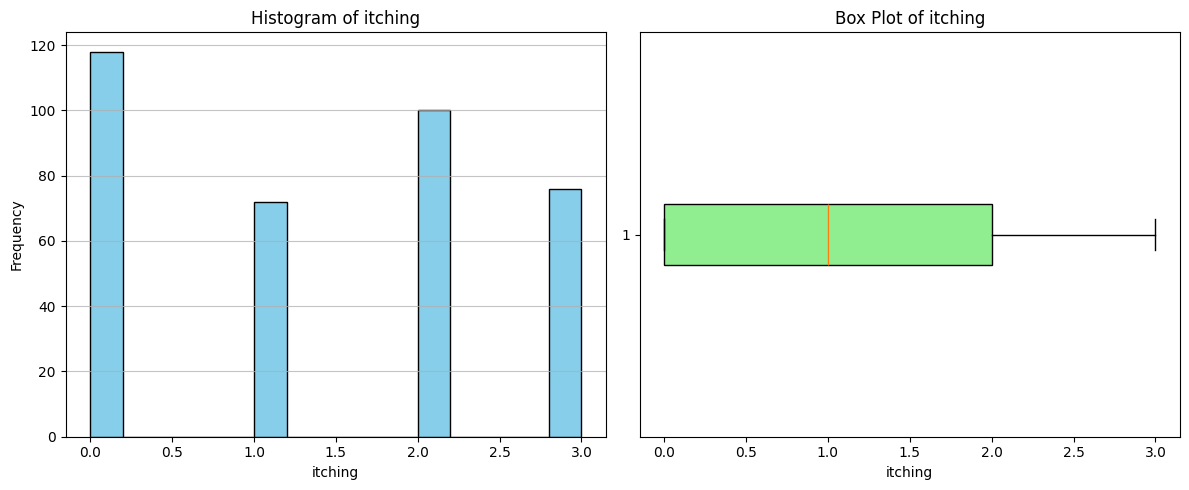

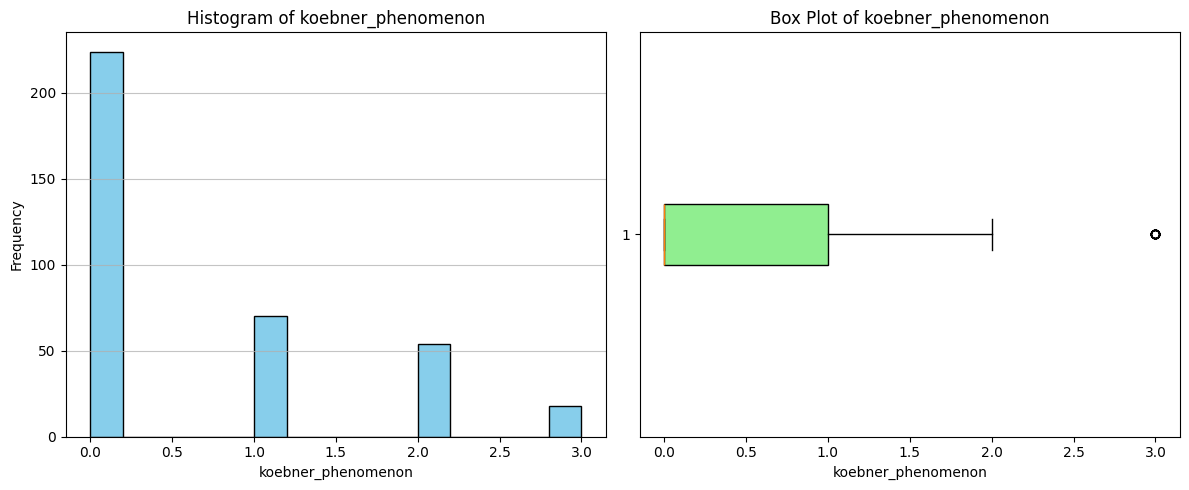

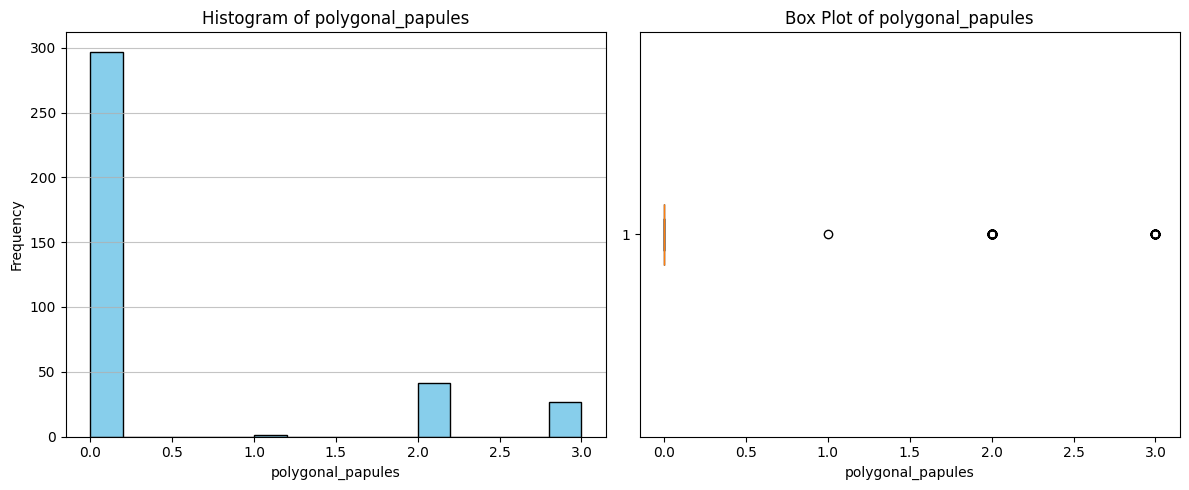

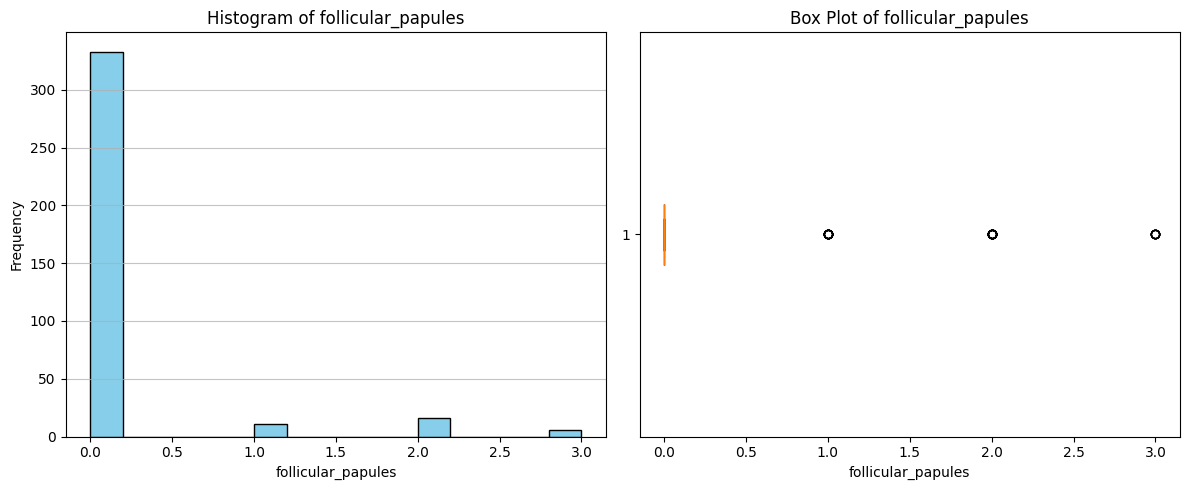

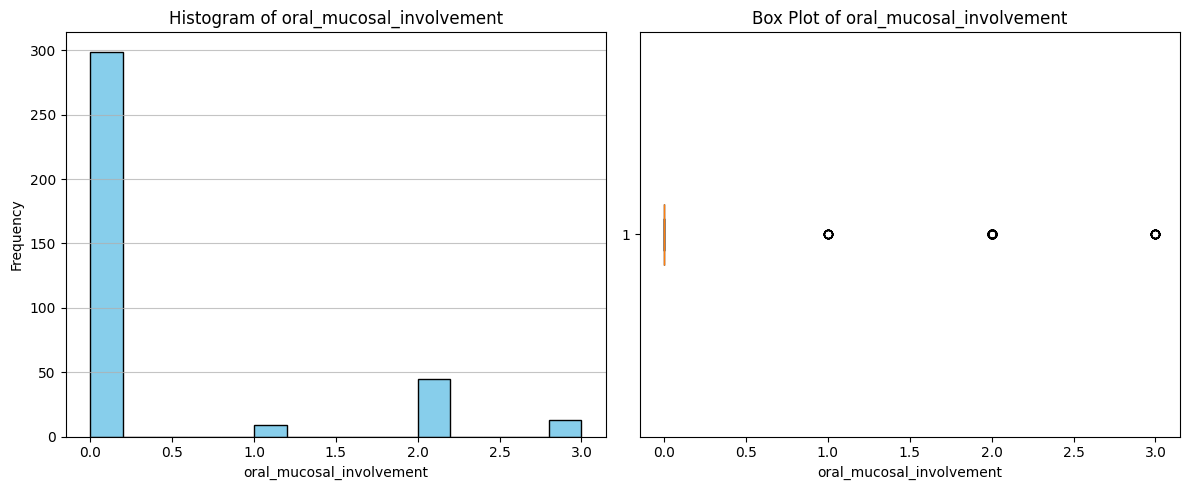

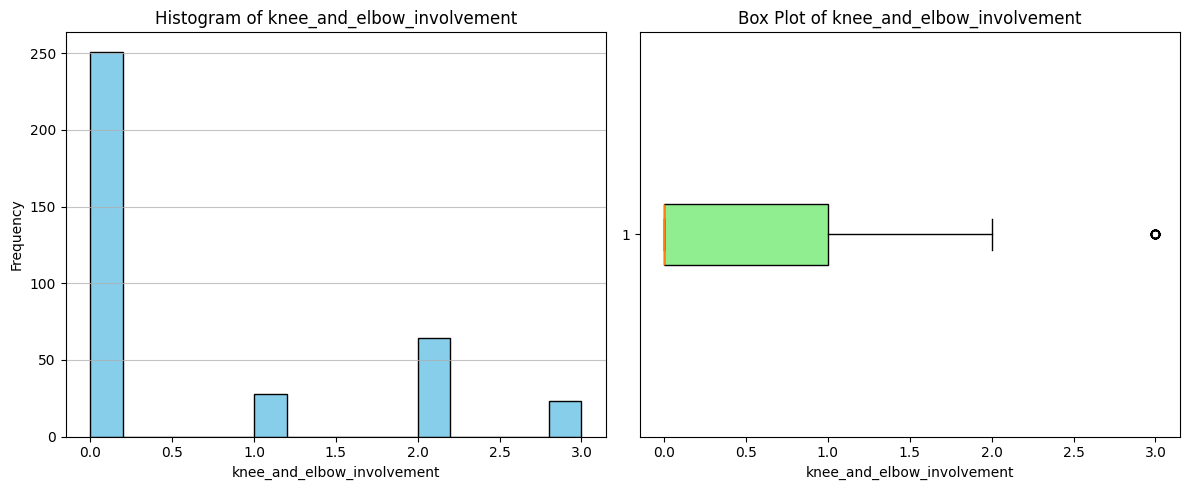

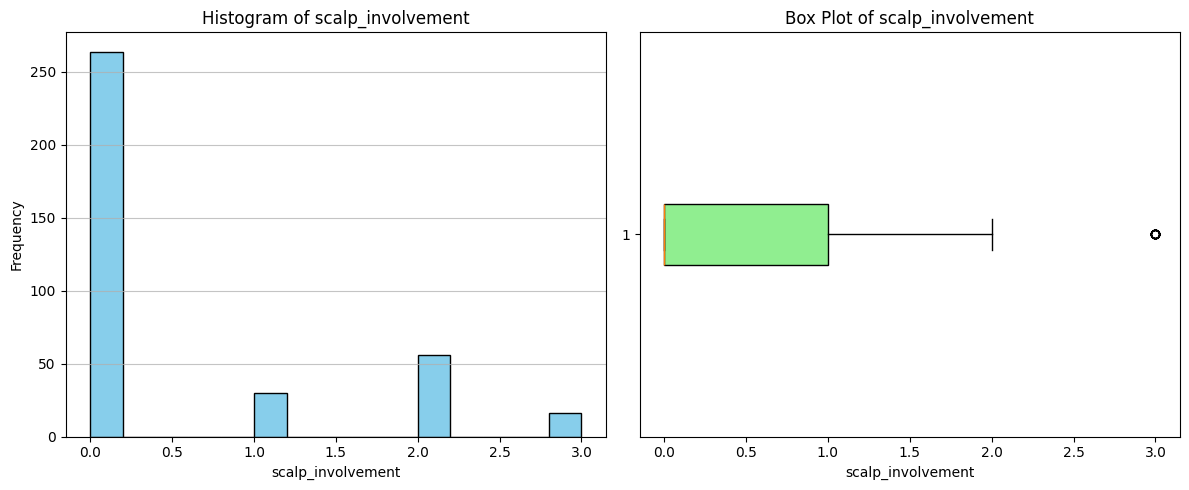

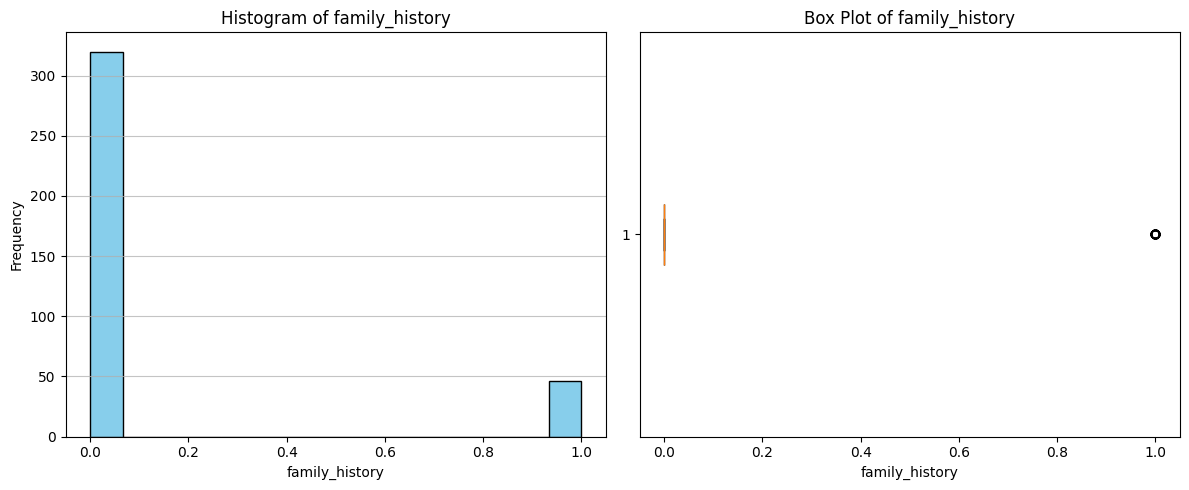

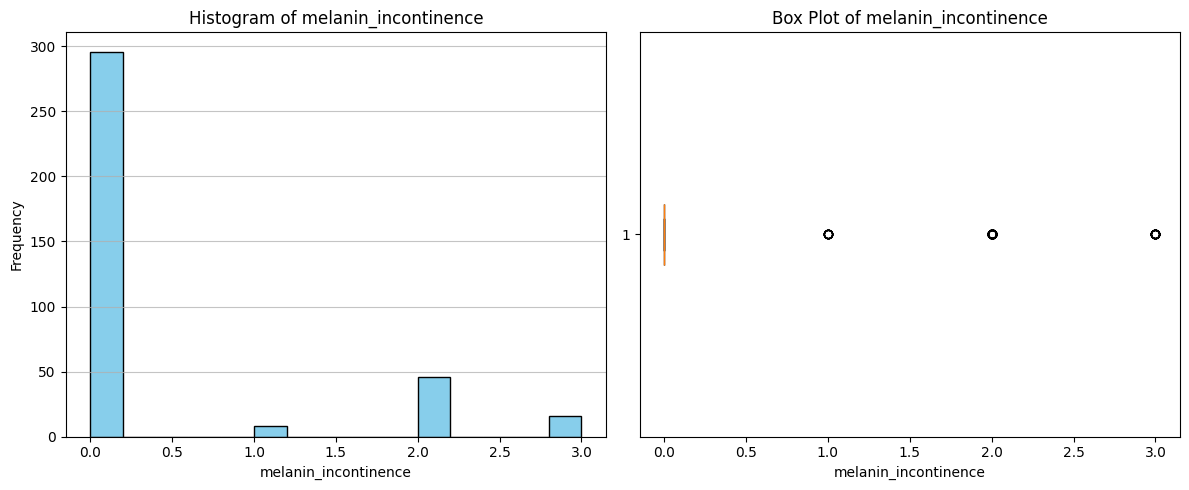

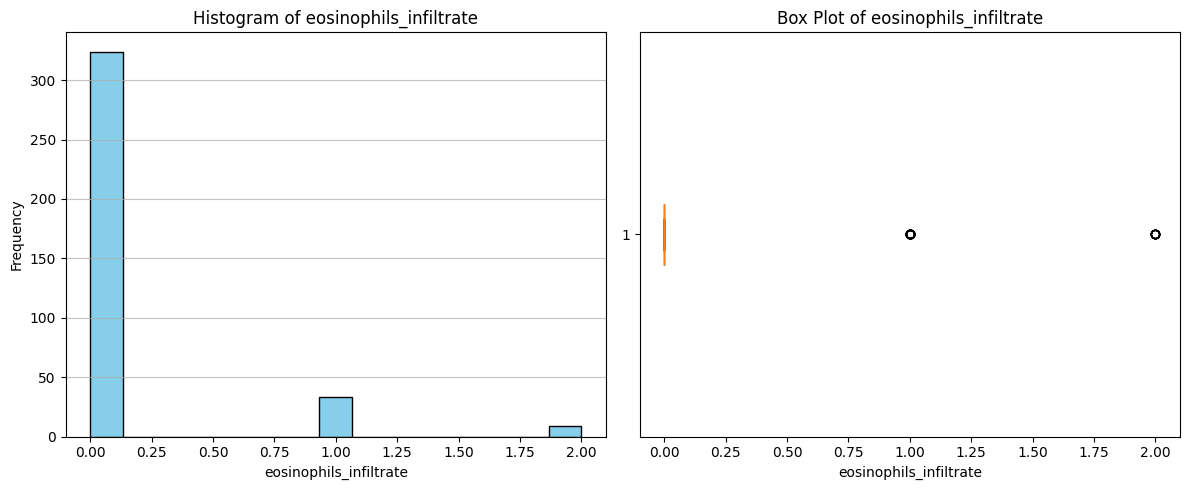

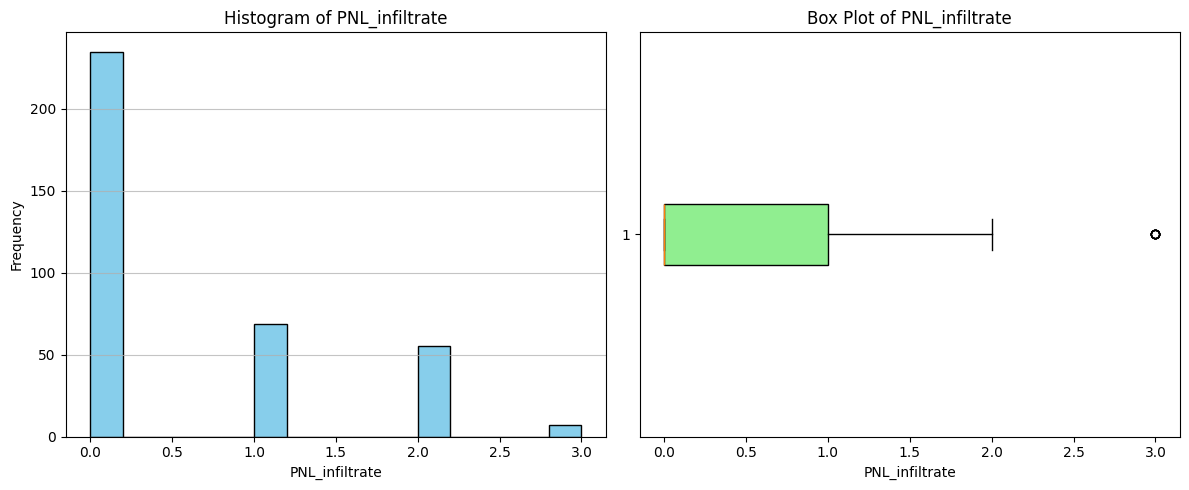

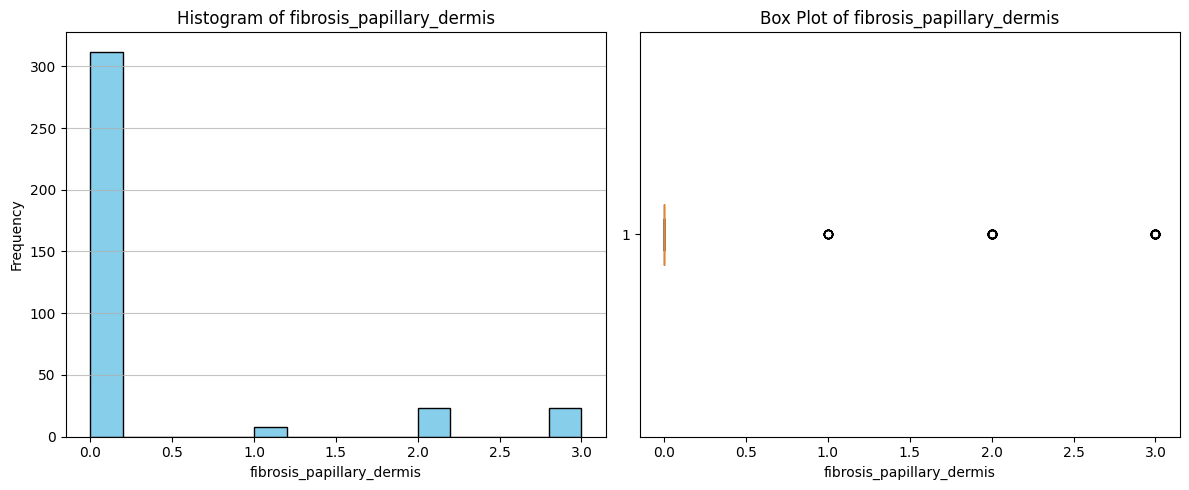

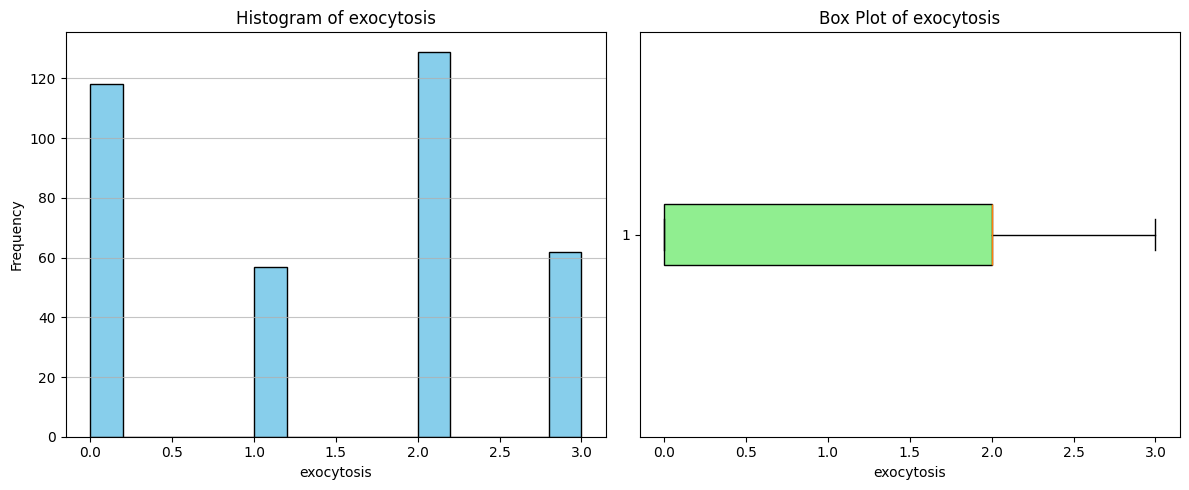

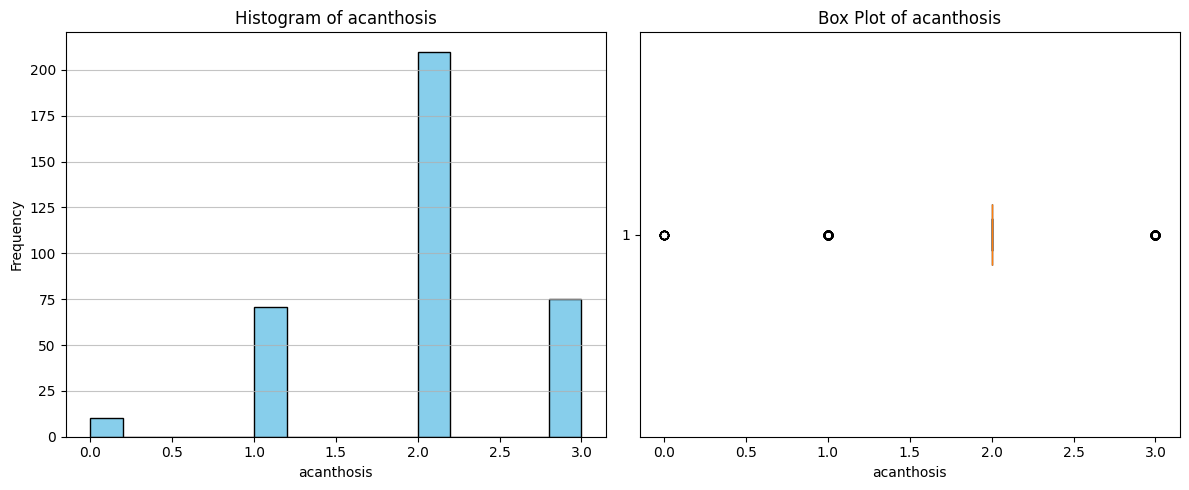

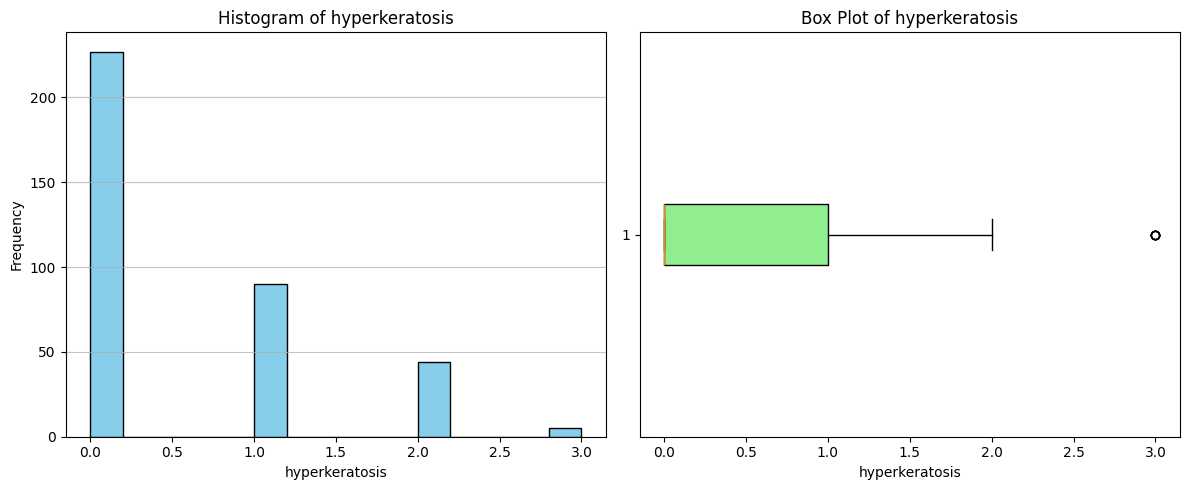

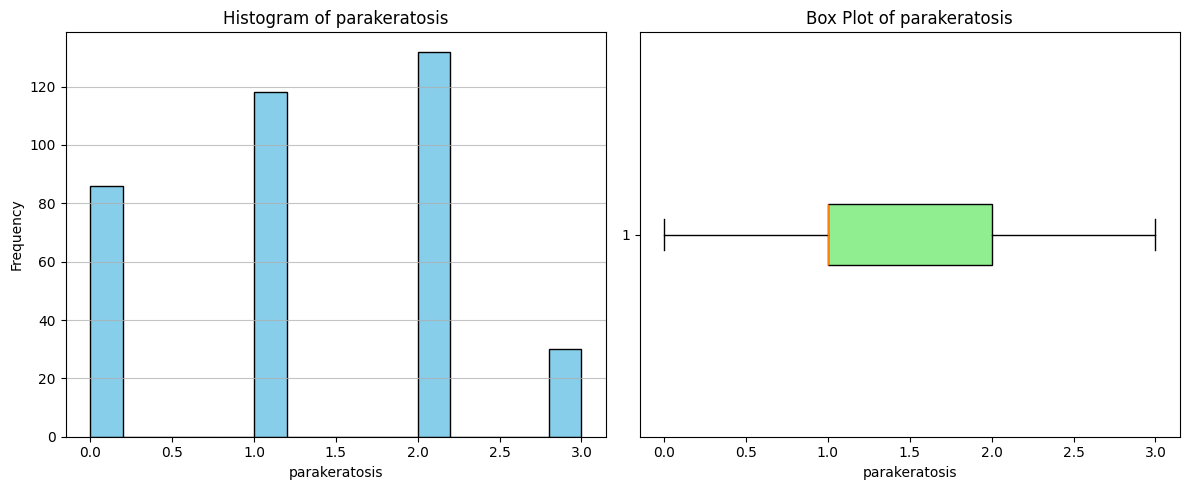

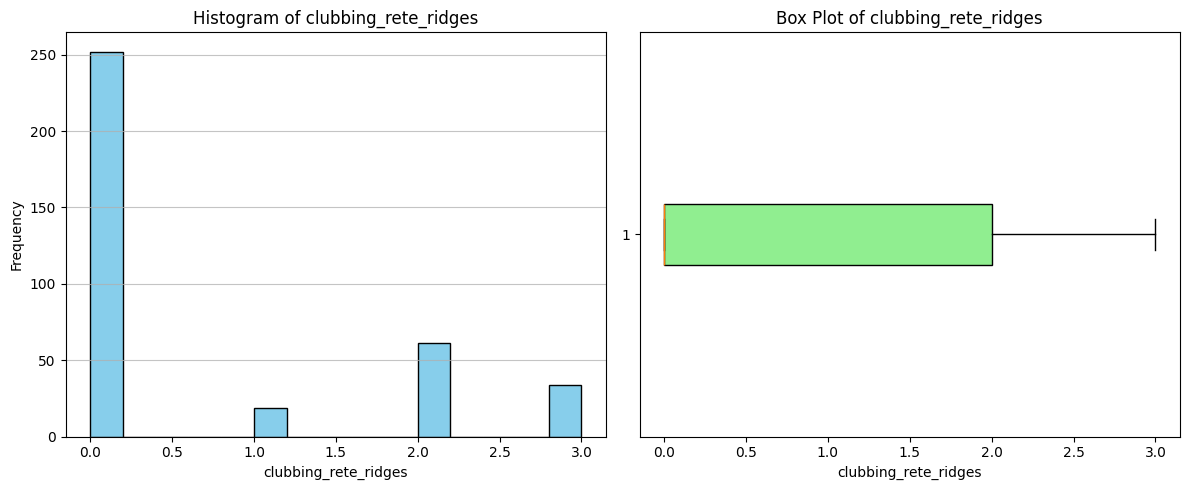

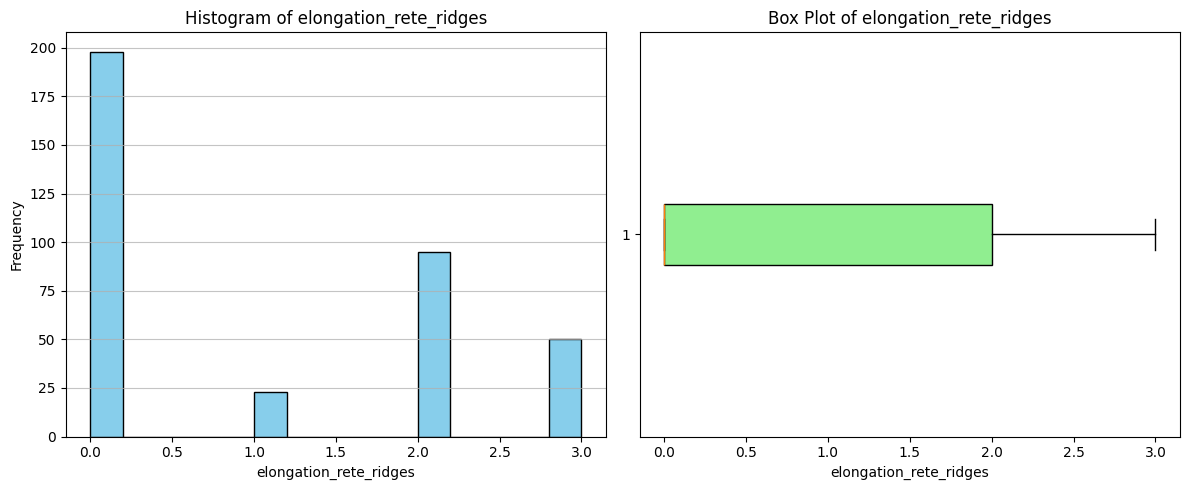

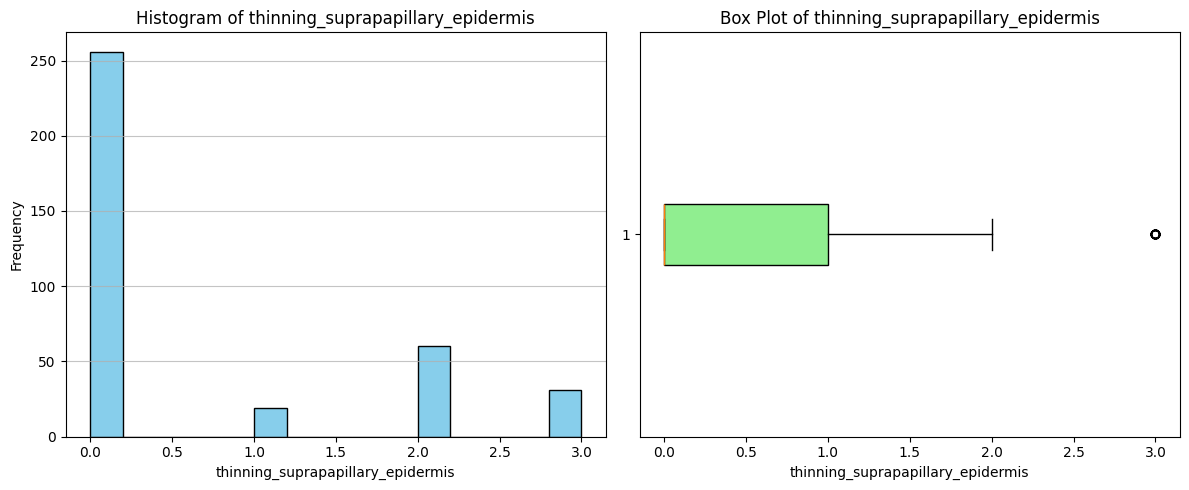

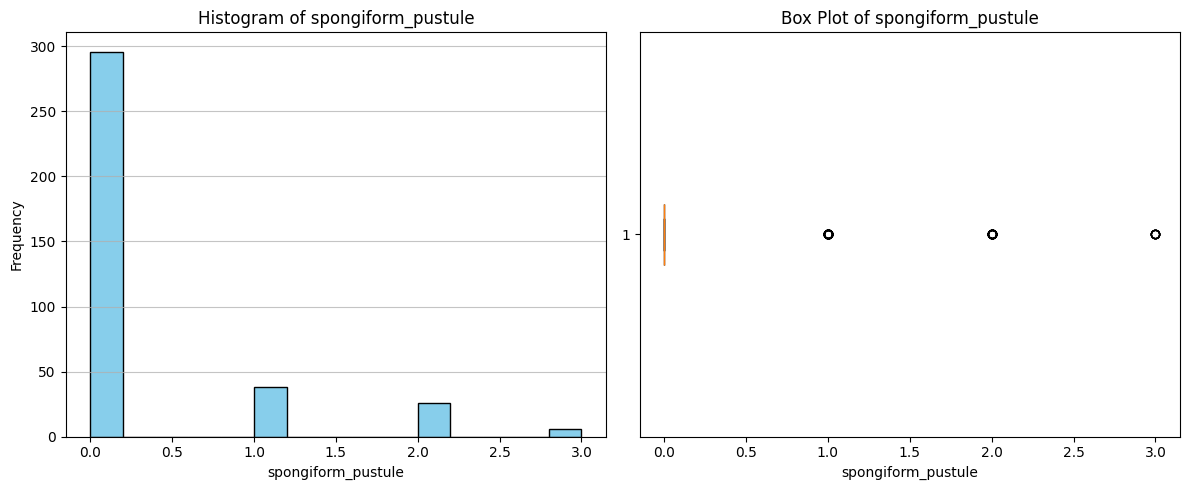

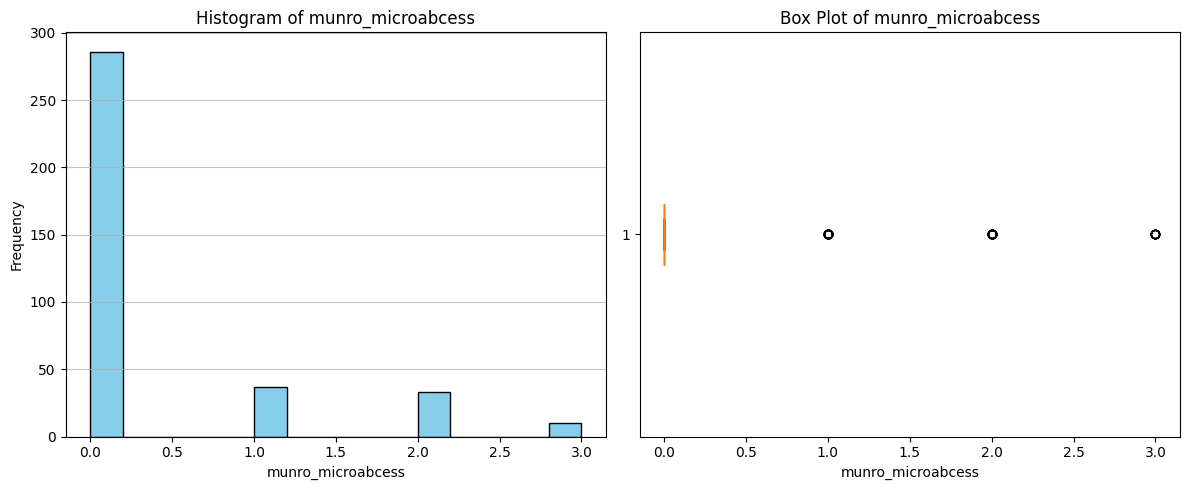

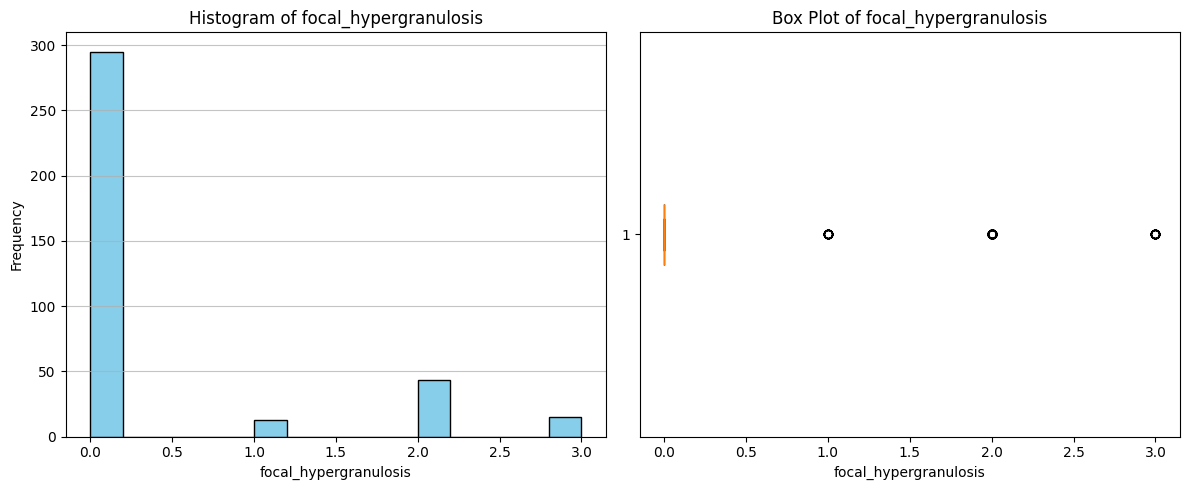

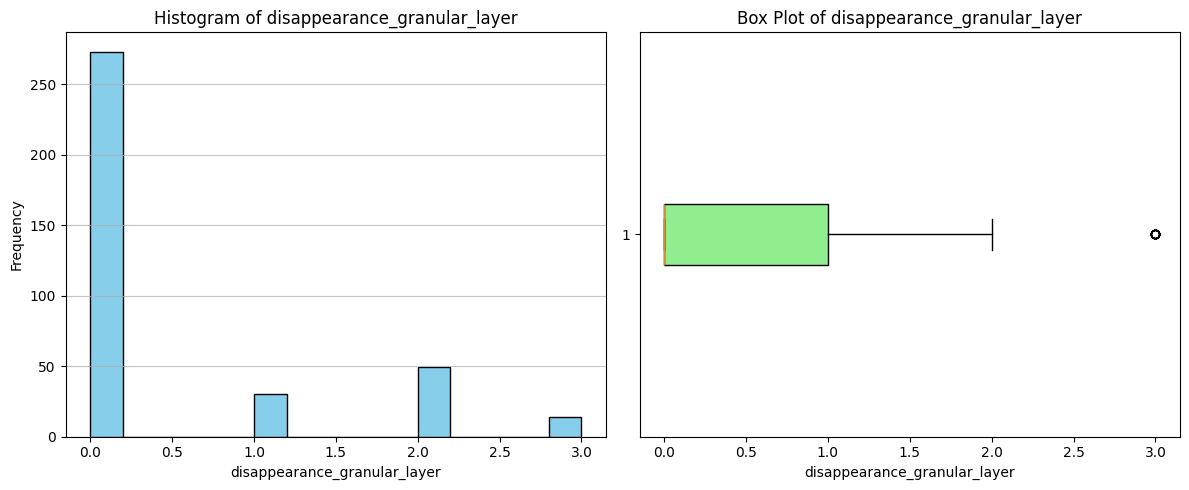

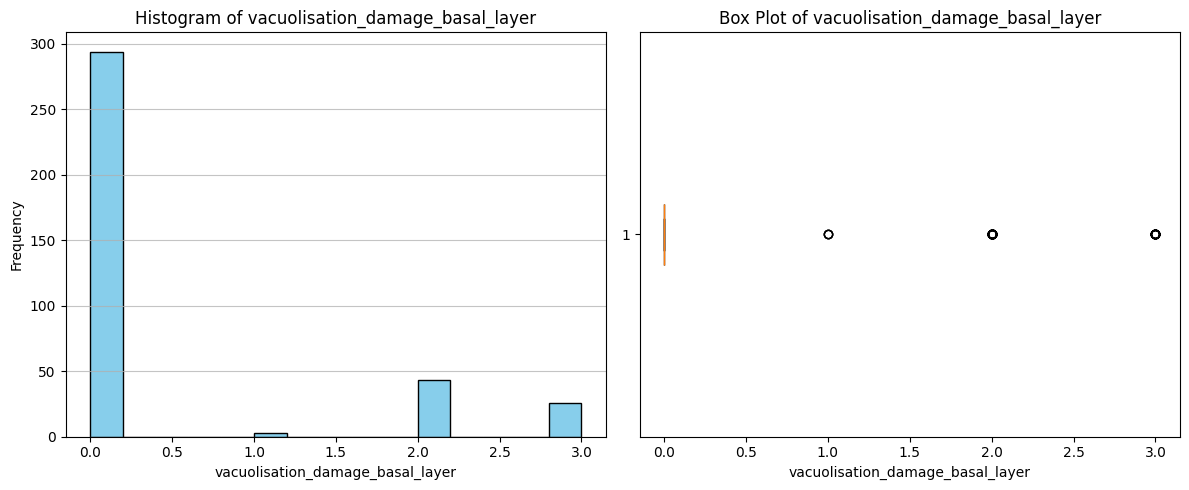

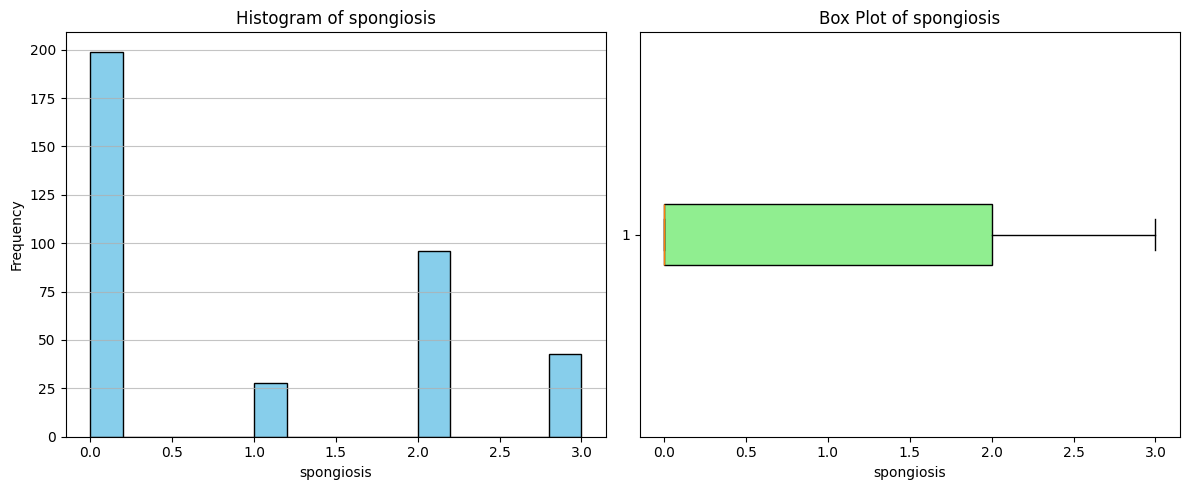

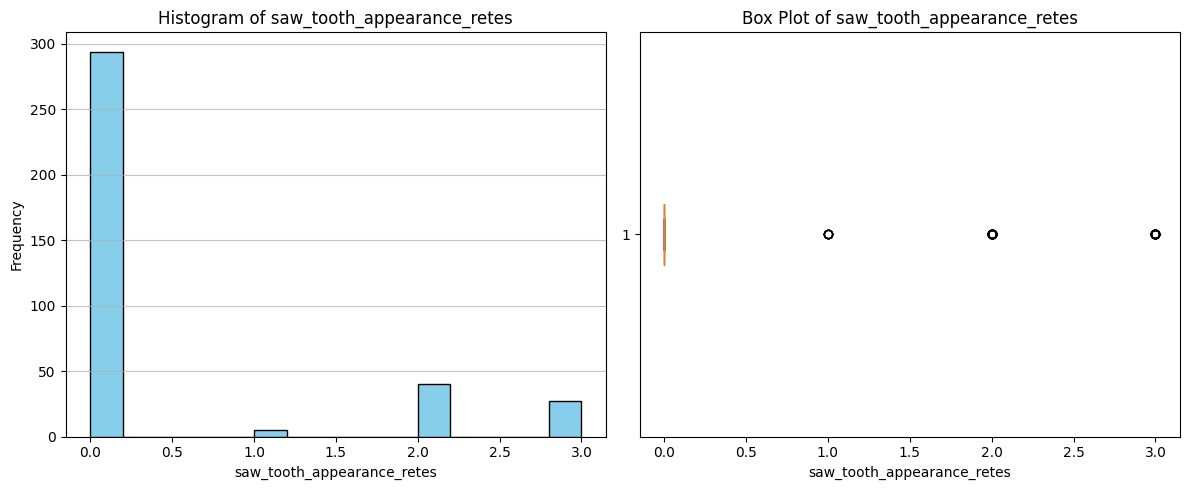

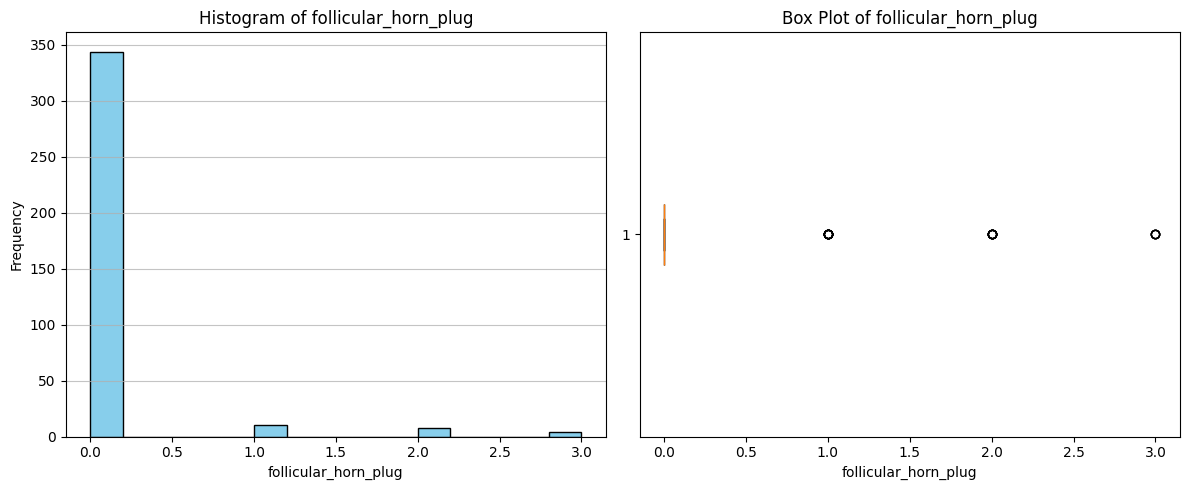

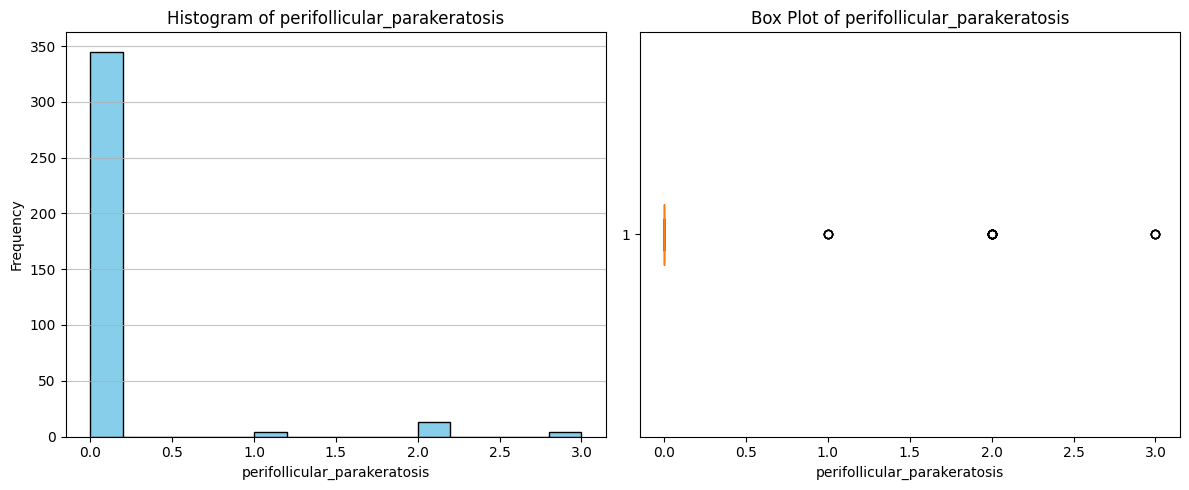

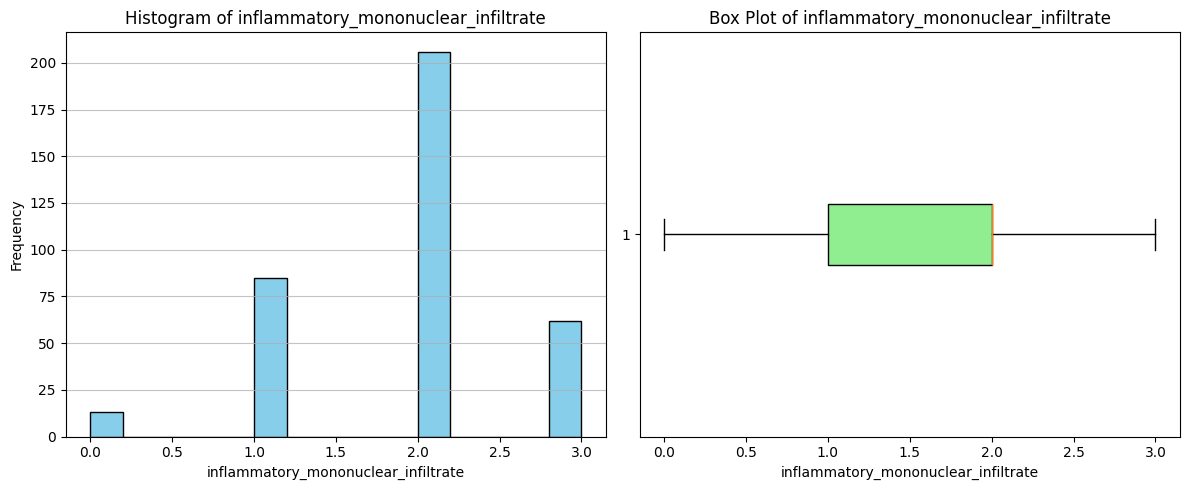

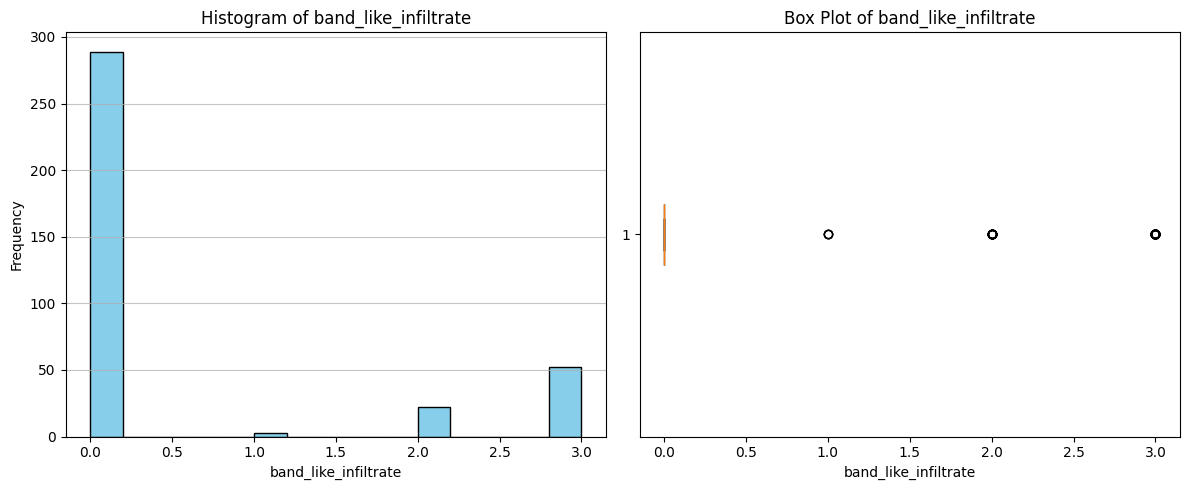

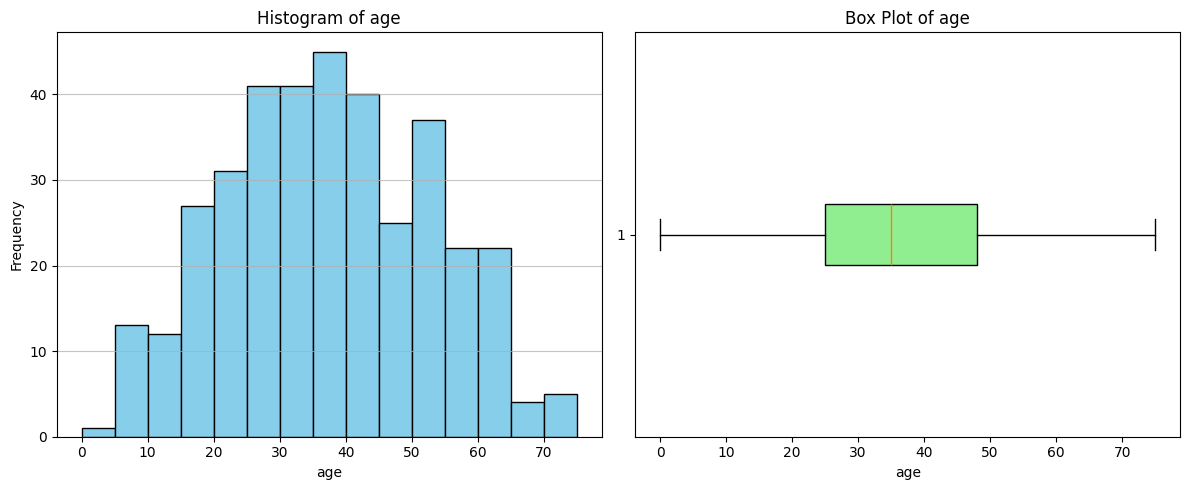

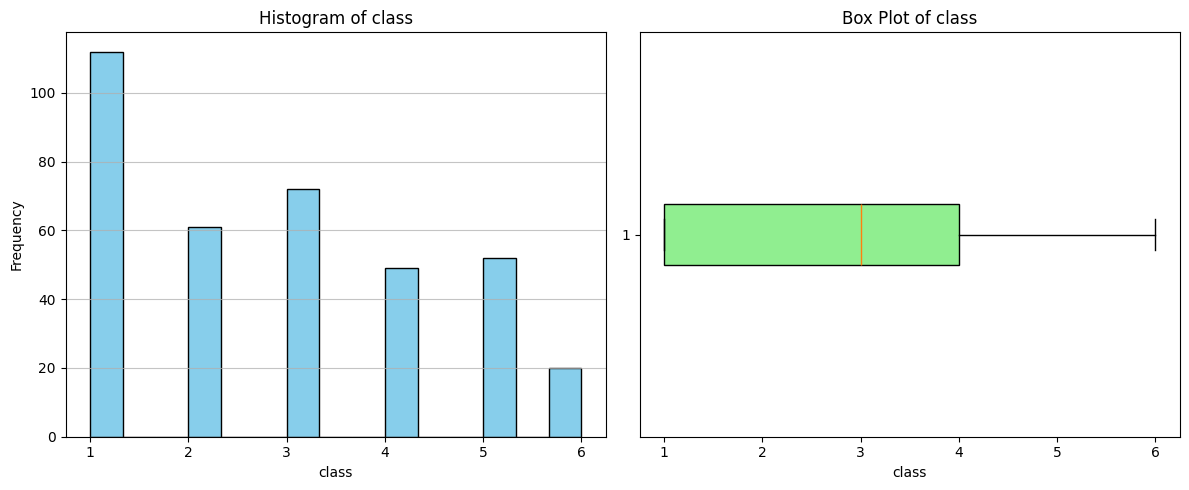

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram and box plot side by side for each column
for column in data.columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)

    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)

    # Show the plots
    plt.tight_layout()
    plt.show()
